In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# 1. Import Data 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

## Import data

In [2]:
# Load Data 
df_train = pd.read_csv("train-data.csv")
df_test = pd.read_csv('train-data.csv')
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df_train.shape

(6019, 14)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
data_sets = [df_train, df_test]

In [7]:
for df in data_sets : 
    df.drop(columns=['Unnamed: 0','New_Price'],inplace=True)

### Check for Null values

In [8]:
print('Null values for each column')
df_train.isnull().sum()

Null values for each column


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

## Data Cleaning

In [9]:
for df in data_sets : 
    df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])
    df['Manufacturer']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [10]:
for df in data_sets : 
    df.drop(columns='Name',inplace=True)

In [11]:
# Manufacturer 

df_train['Manufacturer'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Manufacturer, dtype: int64

In [12]:
drop_manufacturer = ['Force','ISUZU','Smart','Ambassador','Isuzu','Bently','Lamborghini']
for df in data_sets : 
    for col in drop_manufacturer : 
        drop_index = df[df['Manufacturer']==col].index
        df.drop(drop_index,axis=0,inplace=True)

In [13]:
df_train['Model'].value_counts()

Swift         353
City          270
i20           247
Verna         170
Innova        164
             ... 
Beetle          1
XUV300          1
Boxster         1
Countryman      1
F               1
Name: Model, Length: 207, dtype: int64

In [14]:
for df in data_sets : 
    df['Model'].value_counts()[df['Model'].value_counts()<5]

- many types of cars

In [15]:
# Location

df_train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    635
Pune          621
Delhi         553
Kolkata       533
Chennai       492
Jaipur        411
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [16]:
df_train['Year'].value_counts()

2014    794
2015    744
2016    741
2013    649
2017    585
2012    580
2011    465
2010    342
2018    297
2009    198
2008    173
2007    125
2019    102
2006     78
2005     57
2004     31
2003     16
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

In [17]:
for df in data_sets : 
    df['Year']=df['Year'].astype(str)

In [18]:
for df in data_sets : 
    df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])

In [19]:
# Kilometers_Driven 
for df in data_sets : 
    df['Kilometers_Driven'].sort_values(ascending=False)

In [20]:
# Fuel Type

df_train['Fuel_Type'].value_counts()

Diesel      3197
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

- Drop rows with LPG, Electric fuel type, because there are so few of them

In [21]:
for df in data_sets : 
    df = df[(df['Fuel_Type'] != 'LPG') | (df['Fuel_Type']!='Electric')]

In [22]:
# Transmission

df_train['Transmission'].value_counts()

Manual       4293
Automatic    1717
Name: Transmission, dtype: int64

In [23]:
# Owner_type

df_train['Owner_Type'].value_counts()

First             4923
Second             967
Third              111
Fourth & Above       9
Name: Owner_Type, dtype: int64

- Drop row that has "Fourth & Above" owner type, because there are so few of them

In [24]:
for df in data_sets : 
    df = df[df['Owner_Type']!='Fourth & Above']

In [25]:
# Mileage

df_train['Mileage'].value_counts()

18.9 kmpl     172
17.0 kmpl     169
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
21.79 kmpl      1
16.38 kmpl      1
17.16 kmpl      1
7.81 kmpl       1
17.24 kmpl      1
Name: Mileage, Length: 441, dtype: int64

- Convert to numeric values

In [26]:
for df in data_sets : 
    df['Mileage'] = df['Mileage'].map(lambda x: str(x).strip().split(" ")[0])

In [27]:
for df in data_sets : 
    df['Mileage'] = df['Mileage'].astype(float)

### Deal with columns with null values

Replce Null values of engine type and power and seats based on model

In [28]:
# Engine

df_train['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
3200 CC      1
2694 CC      1
2495 CC      1
1978 CC      1
1797 CC      1
Name: Engine, Length: 141, dtype: int64

In [29]:
for df in data_sets : 
    df['Engine'] = df['Engine'].map(lambda x  : str(x).strip().split(' ')[0])

In [30]:
for df in data_sets : 
    df['Engine'] = df['Engine'].astype(float)

In [31]:
model_lst = df['Model'].unique()

for df in data_sets : 
    for model in model_lst : 
        mean_model = df[df['Model']==model]['Engine'].mean() # use mean value to fillna
        df.update(df[df['Model']==model]['Engine'].fillna(mean_model))

In [32]:
# Power 

df_train['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
61 bhp          1
144 bhp         1
71.01 bhp       1
271.72 bhp      1
181.04 bhp      1
Name: Power, Length: 367, dtype: int64

In [33]:
for df in data_sets : 
    df['Power'] = df['Power'].map(lambda x  : str(x).strip().split(' ')[0])

In [34]:
for df in data_sets : 
    df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [35]:
for df in data_sets : 
    for model in model_lst:
        mean_power = df[df["Model"]==model]['Power'].astype(float).mean() # use mean value to fillna
        df.update(df[df['Model']==model]['Power'].fillna(mean_power))

In [36]:
# Seats

for df in data_sets : 
    for model in model_lst:
        base_seat = df[df["Model"]==model]['Seats'].mode(0)[0] # use base on model
        df.update(df[df['Model']==model]['Seats'].fillna(base_seat))

In [37]:
df_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Manufacturer
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Wagon,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Creta,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Jazz,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Ertiga,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,A4,Audi


In [38]:
df_train.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                10
Seats                 6
Price                 0
Model                 0
Manufacturer          0
dtype: int64

- just drop values that didn't fill

In [39]:
for df in data_sets : 
    df.dropna(inplace=True)

In [40]:
df_train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Manufacturer         0
dtype: int64

- We've taken care of all the null values!

## EDA

Text(-2.6999999999999815, 0.5, 'Count')

<Figure size 1440x720 with 0 Axes>

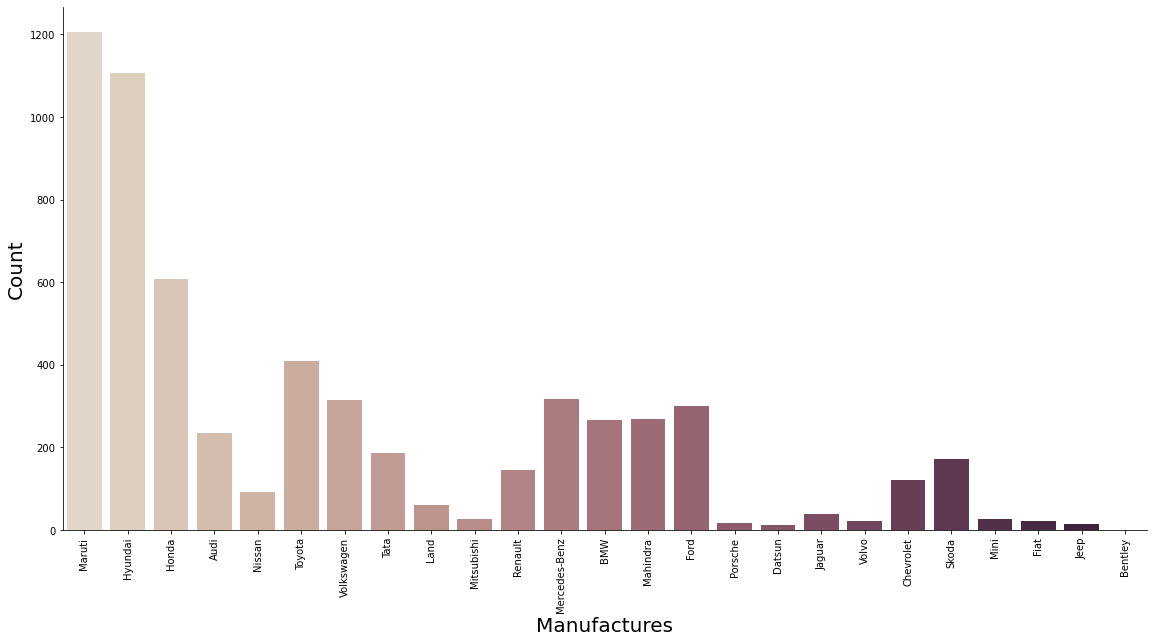

In [41]:
var = "Manufacturer"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_train);
plt.xticks(rotation=90);
plt.xlabel('Manufactures', size=20)
plt.ylabel('Count', size=20)

## Feature Engineering

### Heat Map

Text(0.5, 1.0, 'Correlation Graph')

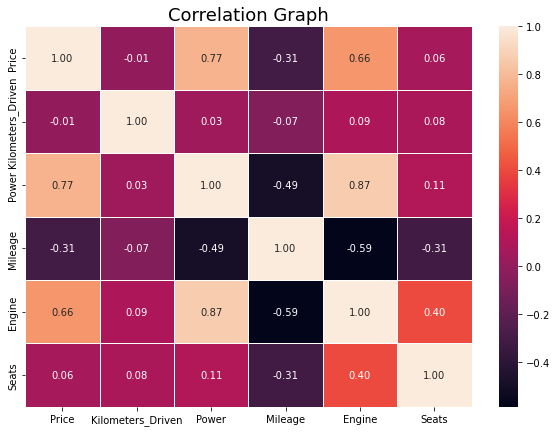

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

- Drop columns with low correlation with price
- Engine, Power has high correlation with Price but also they have strong relation between them
- Drop Engine since it has lower correlation with Price to avoid multicolinearity problem

In [43]:
for df in data_sets : 
    df.drop(['Mileage','Seats','Engine','Kilometers_Driven'],axis=1,inplace=True)

## Encoding

**Label Encoding**

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5995 non-null   object 
 1   Year          5995 non-null   object 
 2   Fuel_Type     5995 non-null   object 
 3   Transmission  5995 non-null   object 
 4   Owner_Type    5995 non-null   object 
 5   Power         5995 non-null   float64
 6   Price         5995 non-null   float64
 7   Model         5995 non-null   object 
 8   Manufacturer  5995 non-null   object 
dtypes: float64(2), object(7)
memory usage: 468.4+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label = LabelEncoder()

In [47]:
label_lst = ['Location', 'Fuel_Type','Transmission','Model','Manufacturer']
for df in data_sets : 
    for col in label_lst : 
        df[col] = label.fit_transform(df[col])

**Ordinal Encoding**

In [48]:
dic = {'First':2,'Second':1,'Third':0}

In [49]:
for df in data_sets : 
    df['Owner_Type']=df['Owner_Type'].map(dic)

In [50]:
dic1 = {'2019':17,"2018":16,"2017":15,"2016":14,"2015":13,"2014":12,"2013":11,"2012":10,"2011":9,"2010":8,"2009":7,"2008":6,"2007":5,"2006":4,"2005":3,"2004":2,"2003":1,"less than 2003":0 }

In [51]:
for df in data_sets : 
    df['Year']=df['Year'].map(dic1)

In [52]:
df_train.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Power,Price,Model,Manufacturer
0,9,8,0,1,2.0,58.16,1.75,176,13
1,10,13,1,1,2.0,126.20,12.50,51,8
2,2,9,3,1,2.0,88.70,4.50,92,7
3,2,10,1,1,2.0,88.76,6.00,65,13
4,3,11,1,0,1.0,140.80,17.74,9,0


In [53]:
df_train.isnull().sum()

Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      9
Power           0
Price           0
Model           0
Manufacturer    0
dtype: int64

In [54]:
df_train.dropna(inplace=True)

In [55]:
df_test.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Power,Price,Model,Manufacturer
0,9,8,0,1,2.0,58.16,1.75,176,13
1,10,13,1,1,2.0,126.20,12.50,51,8
2,2,9,3,1,2.0,88.70,4.50,92,7
3,2,10,1,1,2.0,88.76,6.00,65,13
4,3,11,1,0,1.0,140.80,17.74,9,0


In [56]:
df_test.isnull().sum()

Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      9
Power           0
Price           0
Model           0
Manufacturer    0
dtype: int64

In [57]:
df_test.dropna(inplace=True)

## Train the Model

In [58]:
X_train = df_train.drop("Price",axis=1)  
Y_train= df_train['Price']                
X_test = df_test.drop("Price",axis=1)  
Y_test= df_test['Price']                

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [62]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [63]:
from sklearn.ensemble import AdaBoostRegressor

abr = DecisionTreeRegressor()

In [64]:
regression_models = [lr,rfr,gbr,dtr,abr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train,Y_train))
    score_test.append(model.score(X_test,Y_test))

In [65]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2,3,4
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor
1,0.693089,0.983855,0.921833,0.998486,0.998486
2,0.693089,0.983855,0.921833,0.998486,0.998486


In [66]:
scores = scores.transpose()

In [67]:
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']

In [68]:
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.693089,0.693089
1,Random Forest Regressor,0.983855,0.983855
2,Gradient Boosting Regressor,0.921833,0.921833
3,Decision Tree Regressor,0.998486,0.998486
4,AdaBoostRegressor,0.998486,0.998486


Text(0, 0.5, 'Trainig Set Accuracy')

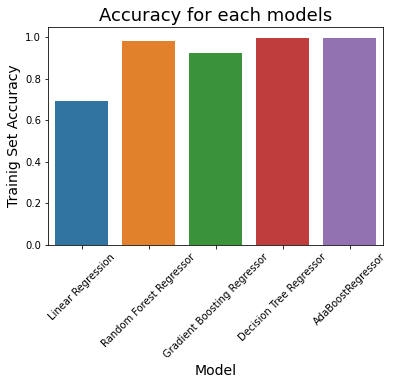

In [69]:
sns.barplot(data=scores, x='Model', y='Training Set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Trainig Set Accuracy',size=14)

Text(0, 0.5, 'Testing Set Accuracy')

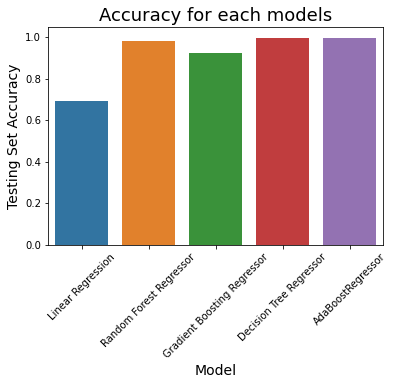

In [70]:
sns.barplot(data=scores, x='Model', y='Testing set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Testing Set Accuracy',size=14)